## Task 1.1

In [1]:
import numpy as np
from CartPole import *
from sklearn import linear_model

In [2]:
    def start_the_cart(initial_values1, initial_values2=None, initial_values3=None, steps=10, remap_angle=False, visual=False, display_plots=True, variable = None):

        cp = CartPole(visual=visual)
        cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values1
        
        

        for step in range(steps):
            if visual: 
                cp.drawPlot()
            cp.performAction()
            if remap_angle: 
                cp.remap_angle()
            inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
            try: 
                x_history = np.vstack((x_history, np.array(inter)))
            except:
                x_history = np.vstack((np.array(initial_values1),np.array(inter)))
        

        
        x_axis=range(len(x_history))
        
        if initial_values2:
            cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values2
        
           

            for step in range(steps):
                if visual: cp.drawPlot()
                cp.performAction()
                if remap_angle: cp.remap_angle()
                inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
                try: 
                    y_history = np.vstack((y_history, np.array(inter)))
                except:
                    y_history = np.vstack((np.array(initial_values2),np.array(inter)))
        
        if initial_values3:
            cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values3
        
            

            for step in range(steps):
                if visual: cp.drawPlot()
                cp.performAction()
                if remap_angle: cp.remap_angle()
                inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
                try: 
                    z_history = np.vstack((z_history, np.array(inter)))
                except:
                    z_history = np.vstack((np.array(initial_values3),np.array(inter)))
        
        if display_plots:
            fig, axs = plt.subplots(2, 2, figsize=(10, 7))

            axs[0,0].plot(x_axis, [x[0] for x in x_history],label='First')
            if initial_values2: axs[0,0].plot(x_axis, [x[0] for x in y_history],label='Second')
            if initial_values3: axs[0,0].plot(x_axis, [x[0] for x in z_history],label='Third')

            axs[0,1].plot(x_axis, [x[1] for x in x_history])
            if initial_values2: axs[0,1].plot(x_axis, [x[1] for x in y_history])
            if initial_values3: axs[0,1].plot(x_axis, [x[1] for x in z_history])
           
            axs[1,0].plot(x_axis, [x[2] for x in x_history])
            if initial_values2: axs[1,0].plot(x_axis, [x[2] for x in y_history])
            if initial_values3: axs[1,0].plot(x_axis, [x[2] for x in z_history])
            
            axs[1,1].plot(x_axis, [x[3] for x in x_history])
            if initial_values2: axs[1,1].plot(x_axis, [x[3] for x in y_history])
            if initial_values3: axs[1,1].plot(x_axis, [x[3] for x in z_history])
            
            #Set titles
            axs[0,0].set_title('Cart location')
            axs[0,0].set_xlabel('Steps')
            axs[0,0].set_ylabel('x')

            axs[0,1].set_title('Cart velocity')
            axs[0,1].set_xlabel('Steps')
            axs[0,1].set_ylabel('x_dot')


            axs[1,0].set_title('Pole angle')
            axs[1,0].set_xlabel('Steps')
            axs[1,0].set_ylabel('theta')

            axs[1,1].set_title('Pole velocity')
            axs[1,1].set_xlabel('Steps')
            axs[1,1].set_ylabel('theta_dot')

            if variable: fig.suptitle(('Effect of different initial', variable, 'on cart dynamics'),fontsize=16)

            fig.legend()
            fig.tight_layout()
        
        
        return x_history[-1]

### Stable equilibrium

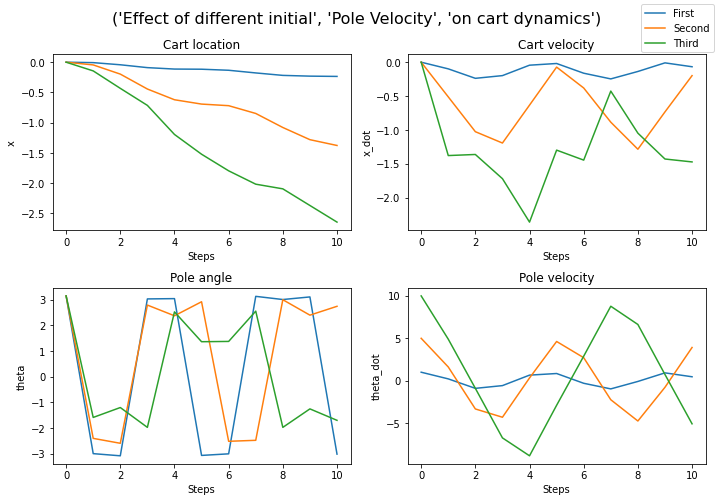

In [3]:
history = start_the_cart([0,0,np.pi,1],[0,0,np.pi,5],[0,0,np.pi,10],visual=False,remap_angle=True,variable = 'Pole Velocity')


### Complete rotation of pendulum

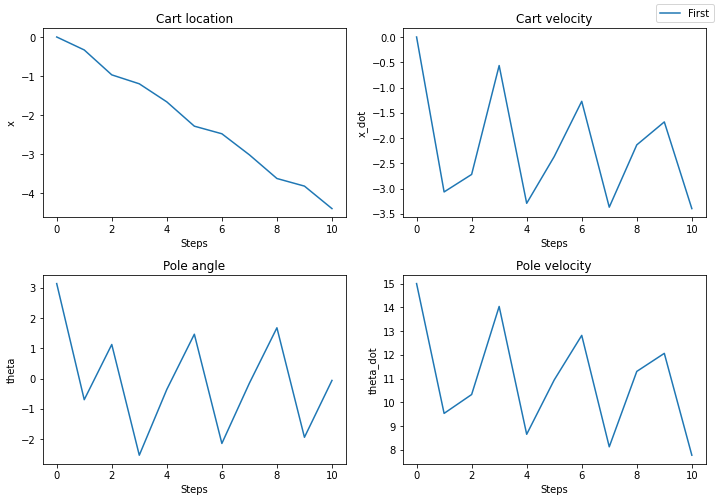

In [4]:
history = start_the_cart([0,0,np.pi,15],visual=False,remap_angle=True)

## Task 1.2

In [5]:
initialize = np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
print(initialize)

[ 4.49999444 -3.74501412  1.35810059 -4.12103436]


In [6]:
variable_number={0:'Cart location',1:'Cart velocity',2:'Pole angle',3:'Pole velocity'}

In [7]:
def one_step(variable, x_axis_range, x_axis_intervals):
    
    
    
    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        y = start_the_cart(x, steps=steps, display_plots=False)

        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axs[0,0].plot(x_axis, [y[0] for y in final_y])
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
   
    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle(('Effect of initial {} on cart dynamics after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

### Vary cart location


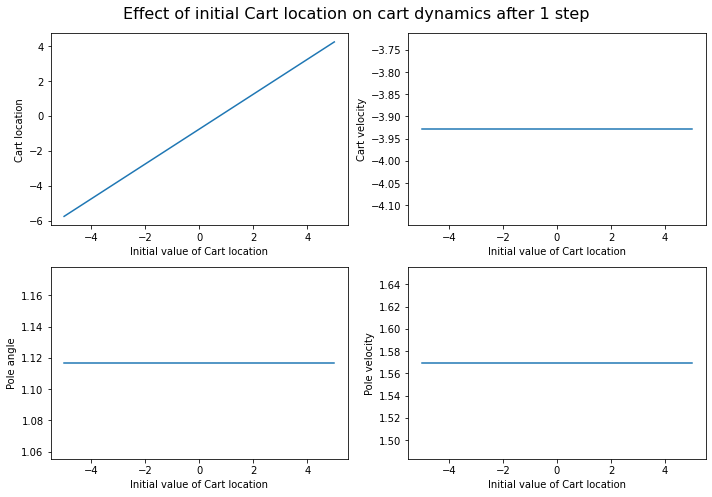

In [8]:
one_step(0,[-5,5],15)

### Vary cart velocity

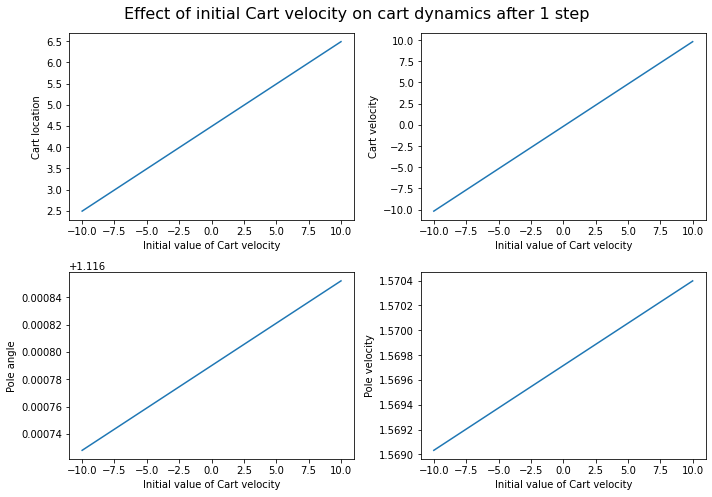

In [9]:
one_step(1,[-10,10],15)

### Vary pole angle

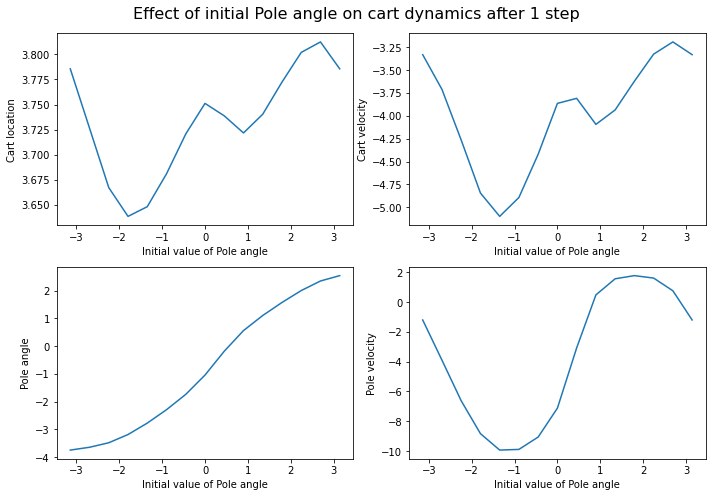

In [10]:
one_step(2,[-np.pi,np.pi],15)

### Vary pole velocity

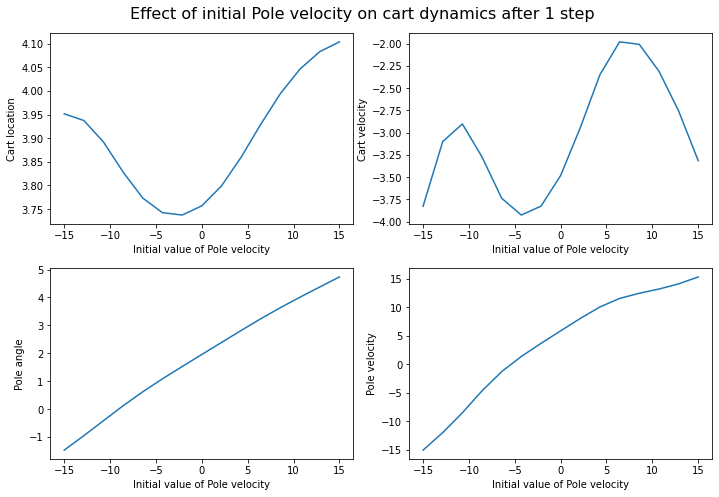

In [11]:
one_step(3,[-15,15],15)

### Creating a variable "y", the difference between x

In [12]:
def one_step_difference(variable, x_axis_range, x_axis_intervals):

    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False)
        y = x_t-x
        
        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)
   

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axs[0,0].plot(x_axis, [y[0] for y in final_y])
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle(('Effect of initial {} on cart dynamics after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

    return final_y

### (i) Scans of single relationships

### Vary cart location

array([[-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387],
       [-0.75890395, -0.18371489, -0.24133386,  5.69049387]])

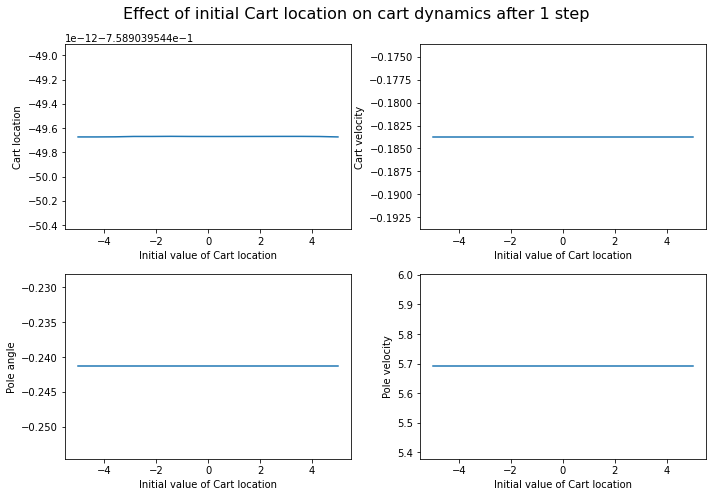

In [13]:
one_step_difference(0,[-5,5],15)

### Vary cart velocity

array([[-2.0098333 , -0.18304987, -0.24137262,  5.69006675],
       [-1.7241345 , -0.18320175, -0.24136377,  5.6901643 ],
       [-1.43843571, -0.18335364, -0.24135492,  5.69026185],
       [-1.15273692, -0.18350552, -0.24134606,  5.6903594 ],
       [-0.86703812, -0.1836574 , -0.24133721,  5.69045695],
       [-0.58133933, -0.18380928, -0.24132836,  5.6905545 ],
       [-0.29564054, -0.18396116, -0.2413195 ,  5.69065205],
       [-0.00994174, -0.18411304, -0.24131065,  5.69074959],
       [ 0.27575705, -0.18426492, -0.2413018 ,  5.69084713],
       [ 0.56145584, -0.1844168 , -0.24129294,  5.69094468],
       [ 0.84715464, -0.18456868, -0.24128409,  5.69104222],
       [ 1.13285343, -0.18472056, -0.24127524,  5.69113976],
       [ 1.41855222, -0.18487244, -0.24126638,  5.69123729],
       [ 1.70425102, -0.18502432, -0.24125753,  5.69133483],
       [ 1.98994981, -0.18517619, -0.24124868,  5.69143236]])

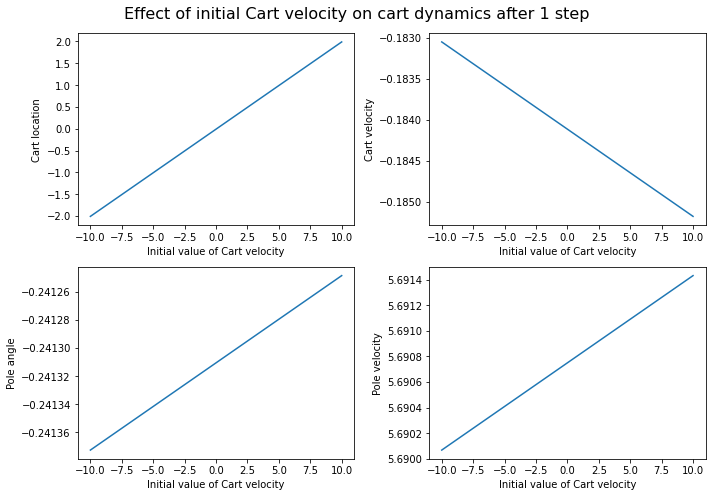

In [14]:
one_step_difference(1,[-10,10],15)

### Vary pole angle


array([[-0.71443139,  0.41298969, -0.60166033,  2.91542287],
       [-0.77358239,  0.03349384, -0.94908419,  0.22034788],
       [-0.83284426, -0.52033541, -1.23527684, -2.50506919],
       [-0.86147319, -1.09908968, -1.38817718, -4.70823528],
       [-0.85180444, -1.3542387 , -1.42496562, -5.81089219],
       [-0.81903239, -1.14748809, -1.3911418 , -5.76569717],
       [-0.77934497, -0.6748854 , -1.28761171, -4.93563716],
       [-0.74886842, -0.11924927, -1.04140639, -2.99784745],
       [-0.76126118, -0.06439603, -0.63178455,  1.04244258],
       [-0.77832186, -0.34887603, -0.33724676,  4.59722839],
       [-0.75965594, -0.19095281, -0.24243921,  5.6785438 ],
       [-0.72762096,  0.12264986, -0.22258596,  5.88960876],
       [-0.69804521,  0.41900266, -0.24202249,  5.72544382],
       [-0.68758948,  0.55231511, -0.34606285,  4.87311871],
       [-0.71443139,  0.41298969, -0.60166033,  2.91542287]])

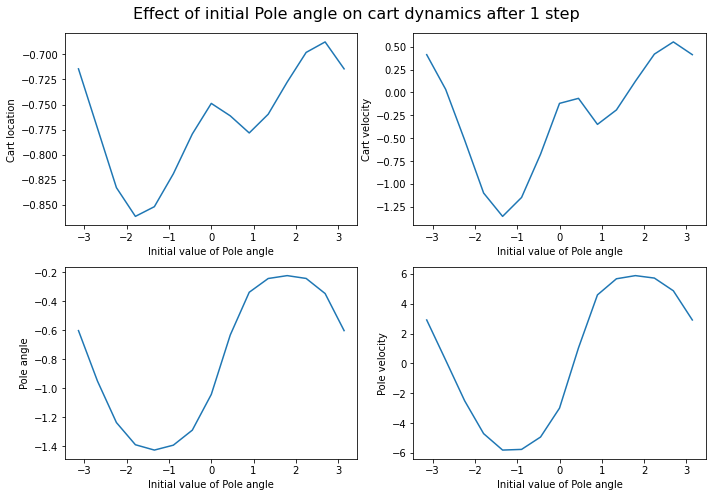

In [15]:
one_step_difference(2,[-np.pi,np.pi],15)


### Vary pole velocity

array([[-0.54848109, -0.08380835, -2.83446601, -0.02925769],
       [-0.56259445,  0.64437685, -2.31459765,  0.89872948],
       [-0.60820528,  0.84247464, -1.77671347,  2.22976363],
       [-0.6718879 ,  0.47149645, -1.24076352,  3.93206177],
       [-0.72681658,  0.00708935, -0.73942782,  5.15593747],
       [-0.75761988, -0.18176672, -0.2758278 ,  5.67032919],
       [-0.76259921, -0.08180417,  0.16520547,  5.82219843],
       [-0.74317036,  0.26240581,  0.59702521,  5.87051677],
       [-0.70109383,  0.80069513,  1.02767608,  5.9024526 ],
       [-0.64033384,  1.39672871,  1.45798972,  5.77542516],
       [-0.57066295,  1.76587607,  1.87867381,  5.12420928],
       [-0.5056036 ,  1.73803703,  2.27766193,  3.88427973],
       [-0.45362542,  1.43654098,  2.6545647 ,  2.47911644],
       [-0.41705102,  0.99038263,  3.01839433,  1.24714176],
       [-0.39621984,  0.42982388,  3.37883355,  0.3144577 ]])

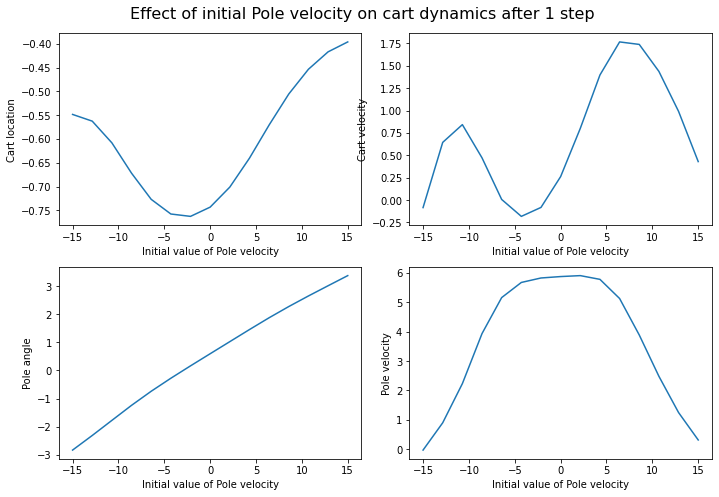

In [16]:
one_step_difference(3,[-15,15],15)

### (ii) Contour plots

In [17]:
different_pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
x_range_for_index = {0 : np.linspace(-5,5,10), 1 : np.linspace(-10,10,10), 2 : np.linspace(-np.pi,np.pi,10), 3 : np.linspace(-15,15,10)}

def axes_for_pairs(index_pair):
    range_x_pair = []
    for index in index_pair:
        range_x_pair.append(x_range_for_index[index])
    return range_x_pair

def contours_of_pairs(index_pair, range_x_pair):
  
   
    index_1, index_2 = index_pair
    range_1, range_2 = range_x_pair
    
    initial_grid = np.zeros((len(range_1),len(range_2),4))
    final_grid = np.zeros((len(range_1),len(range_2),4))
    
    for i,value_1 in enumerate(range_1):
        for j, value_2 in enumerate(range_2):
            x = initialize.copy()
            x[index_1] = value_1
            x[index_2] = value_2
            initial_grid[i,j] = x
            final_grid[i,j] = np.array(start_the_cart(x, steps=1, display_plots=False))
                            
    y_grid = final_grid - initial_grid
    y_grid = np.moveaxis(y_grid, -1, 0)   
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 9))
    
    axs[0,0].contourf(range_1, range_2, y_grid[0].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,0].set_title('cart_location')
    axs[0,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,0].set_ylabel('{} initial value'.format(variable_number[index_2]))   

    axs[0,1].contourf(range_1, range_2, y_grid[1].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,1].set_title('cart_velocity')
    axs[0,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,1].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,0].contourf(range_1, range_2, y_grid[2].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,0].set_title('pole_angle')
    axs[1,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,0].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,1].contourf(range_1, range_2, y_grid[3].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,1].set_title('pole_velocity')
    axs[1,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,1].set_ylabel('{} initial value'.format(variable_number[index_2]))
    
    fig.tight_layout()

_____________________Plots of Cart location vs Cart velocity_____________________


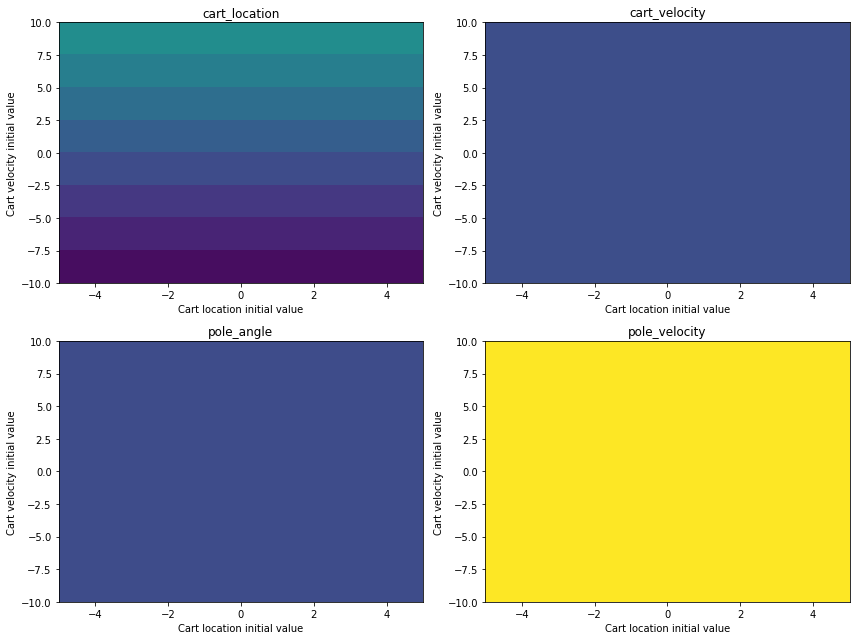

_____________________Plots of Cart location vs Pole angle_____________________


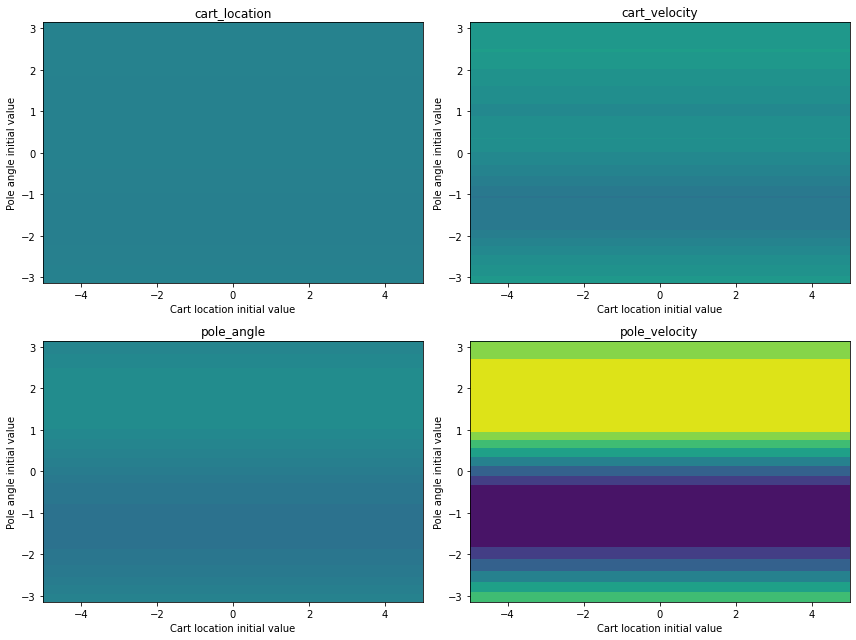

_____________________Plots of Cart location vs Pole velocity_____________________


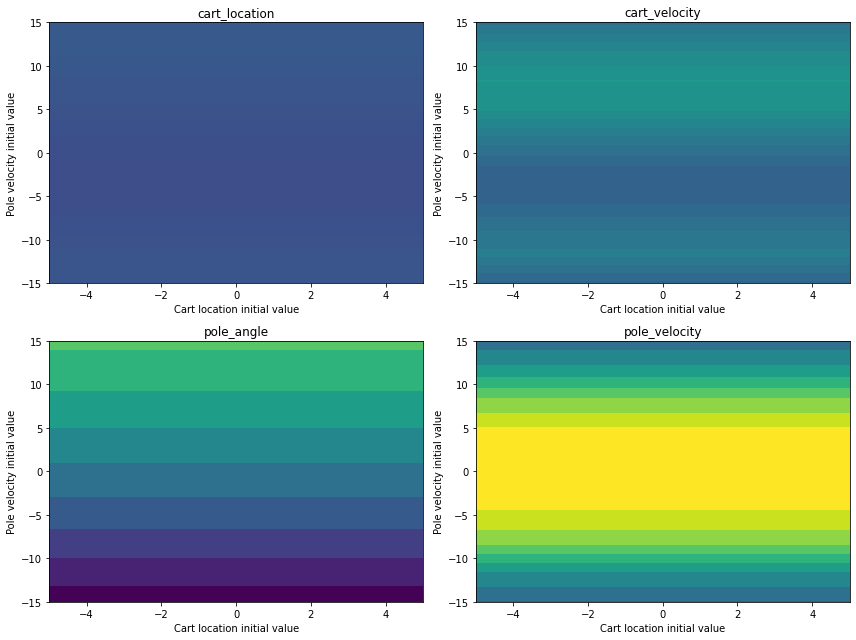

_____________________Plots of Cart velocity vs Pole angle_____________________


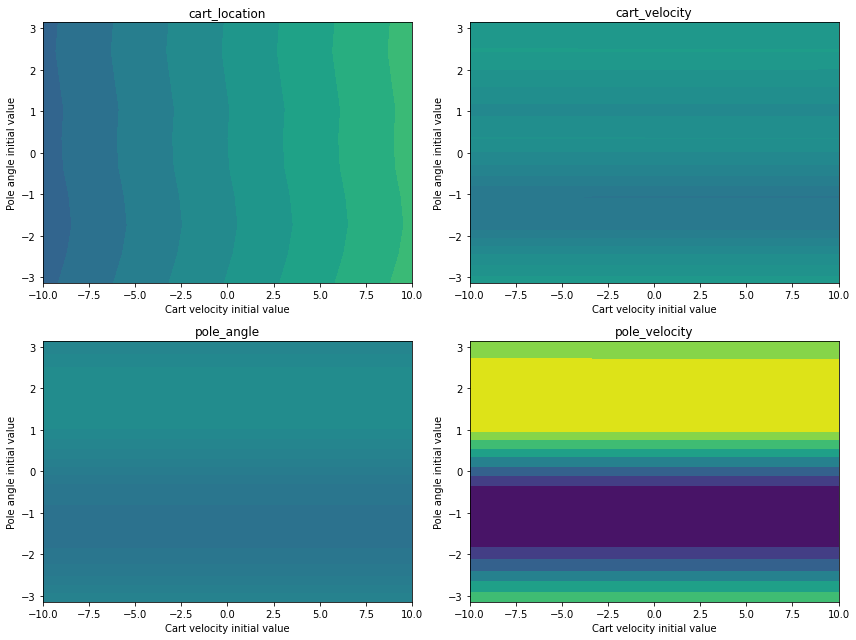

_____________________Plots of Cart velocity vs Pole velocity_____________________


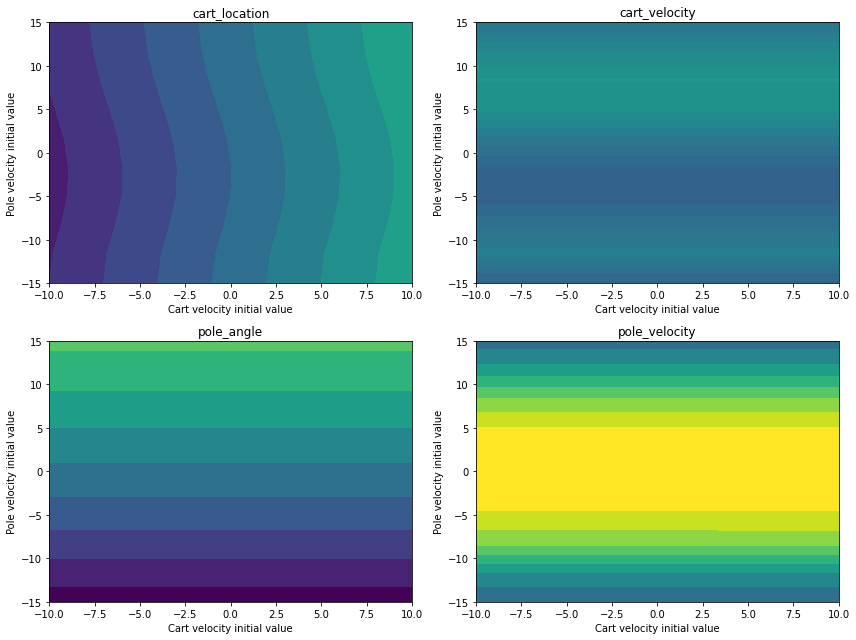

_____________________Plots of Pole angle vs Pole velocity_____________________


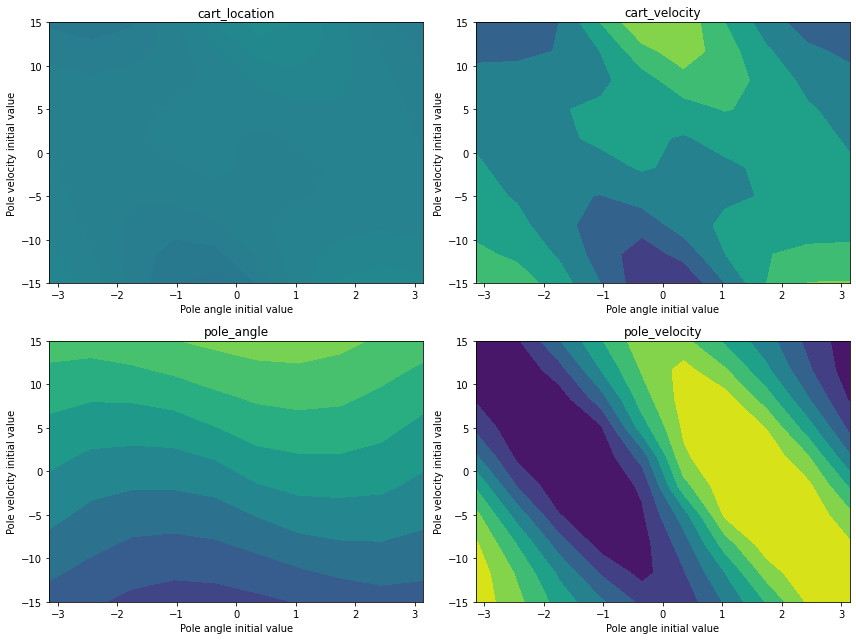

In [18]:
for index_pair in different_pairs:
     print('_____________________Plots of {} vs {}_____________________'.format(variable_number[index_pair[0]],variable_number[index_pair[1]]))
     contours_of_pairs(index_pair, axes_for_pairs(index_pair))
     plt.show()
     plt.close()

## Task 1.3

In [19]:
def get_xy_pairs(n):
    
    for iteration in range(n):
        random_point= np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
        y = start_the_cart(random_point,steps=1, remap_angle=True,display_plots=False)
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_x = np.vstack((final_x, np.array(random_point)))
        except:
            final_y = np.array(y)
            final_x = np.array(random_point)
        

    return final_x,final_y-final_x

In [20]:
x,y= get_xy_pairs(500)
get_xy_pairs(5)

(array([[ -0.71139358,   9.54587209,  -1.31057408,   3.19817764],
        [  0.18050078,   4.45513359,  -1.14592256, -14.28193136],
        [  3.08954198,  -3.53723659,  -0.50256582,  -1.05936362],
        [ -3.41298807,  -2.53309512,  -2.34756712,  12.68906657],
        [ -2.46758596,  -6.6327488 ,   0.3911236 ,  -2.67976513]]),
 array([[ 1.92661304,  0.19572162,  0.05366206, -5.73691531],
        [ 0.48211318, -1.33754047,  2.98205016, -1.27755957],
        [-0.67746901,  0.15179359, -0.66731901, -4.72942597],
        [-0.79057394, -2.14130163,  1.92389573, -5.37342941],
        [-1.35036167, -0.20100934, -0.302533  ,  1.89050057]]))

In [21]:
#Create train and test sets
proportion = 0.95
number_of_samples = 500
cutoff = int(proportion*number_of_samples)
train_x= x[:cutoff]
test_x=x[cutoff:]

train_y=y[:cutoff]
test_y=y[cutoff:]


In [22]:
model = linear_model.LinearRegression()
model.fit(train_x,train_y)
m=model.predict(test_x)

In [23]:
def vertical_plot(input,next_step,pred_next_step):

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    axs[0,0].scatter([x[0] for x in input],[y[0] for y in next_step],label='Real value')
    axs[0,0].scatter([x[0] for x in input],[y[0] for y in pred_next_step],label='Predicted Value')
    axs[0,0].set_xlabel('Cart location initial value')
    axs[0,0].set_ylabel('Cart location final value')
    axs[0,0].legend()

    axs[0,1].scatter([x[1] for x in input],[y[1] for y in next_step])
    axs[0,1].scatter([x[1] for x in input],[y[1] for y in pred_next_step])
    axs[0,1].set_xlabel('Cart velocity initial value')
    axs[0,1].set_ylabel('Cart velocity final value')

    axs[1,0].scatter([x[2] for x in input],[y[2] for y in next_step])
    axs[1,0].scatter([x[2] for x in input],[y[2] for y in pred_next_step])
    axs[1,0].set_xlabel('Pole angle initial value')
    axs[1,0].set_ylabel('Pole angle final value')

    axs[1,1].scatter([x[3] for x in input],[y[3] for y in next_step])
    axs[1,1].scatter([x[3] for x in input],[y[3] for y in pred_next_step])
    axs[1,1].set_xlabel('Pole velocity initial value')
    axs[1,1].set_ylabel('Pole velocity final value')

    fig.suptitle('Predictions vs Real values after 1 step')
    fig.tight_layout()

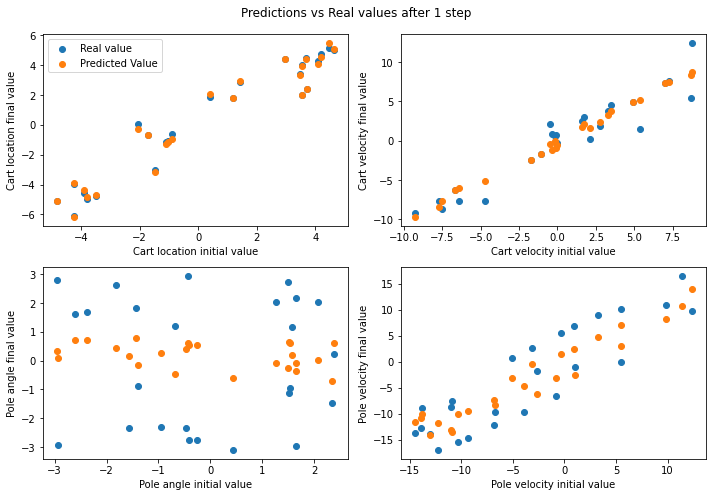

In [24]:
vertical_plot(test_x,test_y+test_x,m+test_x)